In [2]:
import numpy as np
import math as mat

# We start with the uncertainties in the lower bound and faint end slope

* This is done in one of two ways:
<ol>
<li> Pick a center value. Find sum of squared distances from other values to that center value. Take the square root and then divide by the number of other values. </li>
<li> Take all values. Find mean, and find sum of squared distances of all values from that mean. Take square root and divide by N-1 </li>
</ol>

In [3]:
#these 6 values are for the final M/L values with alpha = -1.3 and -1.4, with lower bounds of 10^-4 and 10^-3
#all other parameters are held fixed 

#order: lower = 10^-4: alpha -1.2,-1.3, -1.4 (same for lower = 10^-3)

values_SR = [217.3,270.3,350.9,198.6,233.4,279.6]
values_LSS = [147.7,182.7,236.0,135.3,158.1,188.4]

In [4]:
# we start with method 1. We pick the center value as index 1, which was calculated with a slope of -1.3 
#and a bound of 10^-4 

def rms_center(center_ind,values):
    rms = 0.0
    for val in values:
        dist = val - values[center_ind]
        rms += dist**2
    
    rms = (rms/(len(values)-1))**0.5
    print('The uncertainty is {act:.1f}, or {rel:.2f}% of the center value'\
      .format(act = rms,rel=100*rms/values[center_ind]))
    
    return [rms,rms/values[center_ind]]

print('Lower bound and Alpha, Small Radii')
print('------------------------------ \n')
uncert_SR = rms_center(1,values_SR)
print('\n Lower bound and Alpha, Large Radii')
print('------------------------------ \n')
uncert_LSS = rms_center(1,values_LSS)

Lower bound and Alpha, Small Radii
------------------------------ 

The uncertainty is 56.4, or 20.86% of the center value

 Lower bound and Alpha, Large Radii
------------------------------ 

The uncertainty is 37.3, or 20.41% of the center value


In [5]:
# here's method 2. This just simply uses the mean.
def rms_mean(values):
    rms_2 = 0.0
    mean = np.mean(values)
    print(mean)

    for val in values:
        dist_sqrd = (val - mean)**2
        rms_2 += dist_sqrd

    rms_2 = (rms_2/(len(values)-1))**0.5

    print('The uncertainty is {act:.1f}, or {rel:.2f}% of the mean'\
          .format(act = rms_2,rel=100*rms_2/mean))
    
    return [rms_2,rms_2/mean]

uncert_mean_SR = rms_mean(values_SR)
uncert_mean_LSS = rms_mean(values_LSS)

print('\n' + str(100*uncert_mean_SR[0] / values_SR[1]))
print('\n' + str(100*uncert_mean_LSS[0] / values_LSS[1]))

258.34999999999997
The uncertainty is 54.8, or 21.23% of the mean
174.70000000000002
The uncertainty is 36.2, or 20.74% of the mean

20.288842824264226

19.83521036891513


+ As we can see here, both methods yeild a fairly similar uncertainty.
<ol>
    <li> Method 1: 25.2 M<sub>sol</sub> L<sub>sol</sub><sup>-1</sup>, 25.2 / 270.3 = 9.33% </li>
    <li> Method 2: 24.5 M<sub>sol</sub> L<sub>sol</sub><sup>-1</sup>, 24.5 / 258.35 = 9.49% </li>
</ol>

# Now, we're going to find the uncertainty in the Leuthaud slope. 
This uses the same functions as above

**First, we check how different slopes compare to the data in Leuthaud.**

In [20]:
import pandas as pd
blue_line = pd.read_csv('./Data/LeuthBlueLine.csv',header=None)
leuth_points = pd.read_csv('./Data/LeuthLowLumPoints.csv',header = None)

#print(blue_line)
#print(leuth_points)

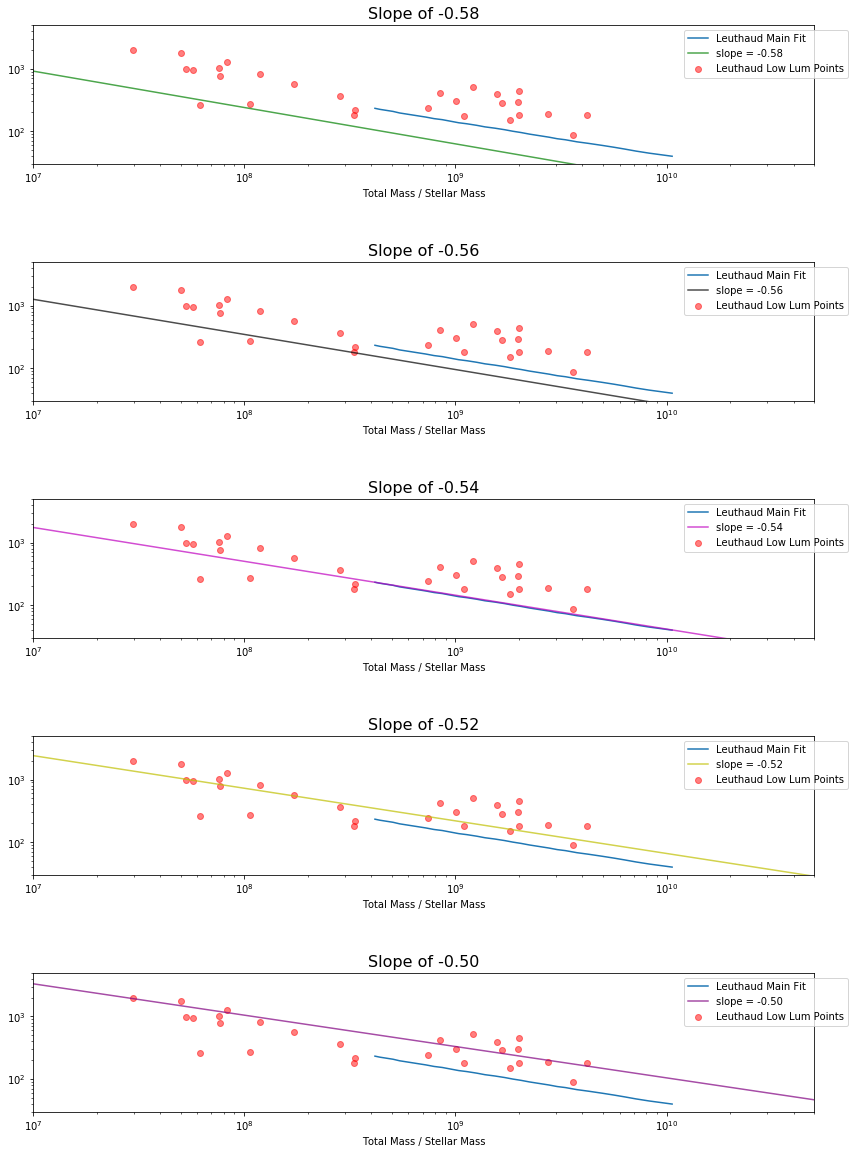

In [78]:
import matplotlib.pyplot as plt
import random

def sloped_line(L,slope):
    '''takes in a slope, and returns y-values to correspond to the x-values s.t. y proportional to L^slope'''
    norm = 1.05e7
    y = norm * L**(slope)
    return y

lums = np.arange(1e7,5e10,1e8)

leuth_line_lums = blue_line[0]
leuth_line_mPerMstar = blue_line[1]

#slope of -0.58
five_eight_fracs = sloped_line(lums,-0.58)
#slope of -0.56
five_six_fracs = sloped_line(lums,-0.56)
#slope of -0.54
five_four_fracs = sloped_line(lums,-0.54)
#slope of -0.52
five_two_fracs = sloped_line(lums,-0.52)
#slope of -0.50
five_oh_fracs = sloped_line(lums,-0.50)

funcs = [five_eight_fracs,five_six_fracs,five_four_fracs,five_two_fracs,five_oh_fracs]
names = ['-0.58','-0.56','-0.54','-0.52','-0.50']
colors = ['g','k','m','y','purple']

fig,axs = plt.subplots(nrows = 5,ncols = 1,figsize = (14,20))
for i in range(len(funcs)):
    axs[i].plot(leuth_line_lums,leuth_line_mPerMstar,label = 'Leuthaud Main Fit')
    axs[i].scatter(leuth_points[0],leuth_points[1],color = 'r',alpha = 0.5,label = 'Leuthaud Low Lum Points')

    axs[i].set_xscale('log',basex=10)
    axs[i].set_yscale('log',basey=10)
    
    axs[i].set_xlim(1e7,5e10)
    axs[i].set_ylim(30,5e3)

    axs[i].plot(lums,funcs[i],color = colors[i],label = 'slope = '+ names[i],alpha = 0.7)
    axs[i].legend(bbox_to_anchor=(1.05, 1))
    
    axs[i].set_xlabel('Stellar Mass (Solar Masses)')
    axs[i].set_xlabel('Total Mass / Stellar Mass')
    axs[i].set_title('Slope of ' + names[i],fontsize = 16)

fig.subplots_adjust(hspace = 0.7)

plt.savefig('./Figures/Different_Leuthaud_Slopes.png')
plt.show()

In [ ]:
# the arrays are for values as follows: first value is for a M/L proportional to L^(-0.58), then our center value of 
# L^(-0.54), then L^(-0.50)

leuth_vals_SR = [314.4,270.3,234.9]
leuth_vals_LSS = [212.0,182.7,159.0]

print('Leuthaud Slope, Small Radii')
print('------------------------------ \n')

uncert_leuth_SR = rms_mean(leuth_vals_SR)

print('\n Leuthaud Slope, Large Radii')
print('------------------------------ \n')

uncert_leuth_LSS = rms_mean(leuth_vals_LSS)

print('\n' + str(100*uncert_leuth_SR[0] / leuth_vals_SR[1]))
print('\n' + str(100*uncert_leuth_LSS[0] / leuth_vals_LSS[1]))

# And finally, we're going to do the uncertainty in galaxy morphology.

* **For small radii, we consider three cases**:
<ol>
    
    <li> Base Case: <ul> <li> Bright: 10% Sp, 90% E </li>
        <li>Faint: 20% Sp, 80% E </li> </ul> </li>
    
    <li> Case 2: <ul> <li> Bright: 10% Sp, 90% E </li>
        <li> Faint: 30% Sp, 70% E </li> </ul> </li>
        
    <li> Case 3: <ul> <li> Bright: 10% Sp, 90% E  </li>
	<li> Faint: 10% Sp, 90% E </li> </ul> </li>
</ol>

* **For Large Scale Structure, we consider 6 cases**:
<ol> 
    
    <li> Base Case: <ul> <li> Bright: 50% Sp, 50% E </li>
	<li> Faint: 80% Sp, 20% E </li> </ul> </li>
     
     <li> Case 2 (more bright Sp): <ul> <li> Bright: 70% Sp, 30% E </li>
         <li>Faint: 80% Sp, 20% E </li> </ul> </li>
     
     <li> Case 3 (more faint E): <ul> <li> Bright: 50% Sp, 50% E</li>
     <li>Faint: 60% Sp, 40% E </li> </ul> </li>
     
     <li> Case 4 (more bright Sp, more faint E): <ul> <li>Bright: 70% Sp, 30% E</li>
     <li>Faint: 60% Sp, 40% E</li> </ul> </li>
     
     <li> Case 5 (more faint Sp):  <ul> <li>Bright: 50% Sp, 50% E</li>
     <li>Faint: 90% Sp, 10% E</li> </ul> </li>
     
     <li> Case 6 (more faint Sp, more bright Sp): <ul> <li> Bright: 70% Sp, 30% E</li>
	<li>Faint: 90% Sp, 10% E</li> </ul> </li>
</ol>
    
  
+ The values in each array are listed in the same order

In [ ]:
morph_vals_SR = [270.33,256.41,284.25]
morph_vals_LSS = [182.65,180.57,210.49,208.41,168.73,166.65]

print('Morphology, Small Radii')
print('------------------------------ \n')

uncert_morph_SR = rms_mean(morph_vals_SR)

print(13.9/270.3)

print('\n Morphology, Large Radii')
print('------------------------------ \n')

uncert_morph_LSS = rms_mean(morph_vals_LSS)

print(19.1/182.65)

## Finally, we obtain the total uncertainty for these three factors. We do so by adding all of these in Quadrature

In [ ]:
# small radii
CENTER_VAL_SR = 270.3
CENTER_VAL_LSS = 182.7
#print(uncert_mean_SR)
#print(uncert_leuth_SR)
#print(uncert_morph_SR)

total_uncert_SR = mat.sqrt((uncert_mean_SR[0]/CENTER_VAL_SR)**2 + \
                        (uncert_leuth_SR[0]/CENTER_VAL_SR)**2 + \
                        (uncert_morph_SR[0]/CENTER_VAL_SR)**2)
print('Total Relative Uncertainty for Small Radii: {:.2f}%'\
      .format(total_uncert_SR*100))

total_uncert_LSS = mat.sqrt((uncert_mean_LSS[0]/CENTER_VAL_LSS)**2 + \
                        (uncert_leuth_LSS[0]/CENTER_VAL_LSS)**2 + \
                        (uncert_morph_LSS[0]/CENTER_VAL_LSS)**2)
print('Total Relative Uncertainty for Large Radii: {:.2f}%'\
      .format(total_uncert_LSS*100))